In [1]:
import numpy as np
import pandas as pd

In [2]:
# read data
players = pd.read_csv("D:\DATA_SCIENCE_SELF\K-means\DATA\players_22.csv")
players

M:\Software\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [3]:
# Features used to cluster the players
features = ["overall","potential","wage_eur","value_eur","age"]

In [4]:
# Dropping any rows wahere one of the columns has null or misssing values
# Most of the clustering values are not gonna be work with null values
players = players.dropna(subset=features)

In [5]:
data = players[features].copy()

In [6]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


### 1. Scale the Data
### 2. Initialize random centroids
### 3. Label each data point
### 4. Update centroids
### 5. Repeat steps 3 and 4 Untils centroid stop changeing

### 1. Scale the Data

In [7]:
data = ((data - data.min())/ (data.max() - data.min())) *9 +1

In [8]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


### 2. Initialize random centroids

In [10]:
# Apply method will iterate through each column in the data, x.sample select a random single value
# because x.sample return a panda series and we need float to get single value
######  When float is not used
centroid = data.apply(lambda x: (x.sample()))

In [11]:
centroid

,overall,potential,wage_eur,value_eur,age
1509,NaN,NaN,NaN,NaN,6.333333
4545,NaN,6.478261,NaN,NaN,NaN
10386,4.521739,NaN,NaN,NaN,NaN
14168,NaN,NaN,1.002575,NaN,NaN
14656,NaN,NaN,NaN,1.033218,NaN


In [12]:
centroid = data.apply(lambda x: float(x.sample()))
centroid

overall      2.565217
potential    5.891304
wage_eur     1.141631
value_eur    1.035538
age          3.666667
dtype: float64

In [19]:
def random_centroids(data, k):
    centroids=[]
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [20]:
centroids = random_centroids(data,5)

In [21]:
centroids

,0,1,2,3,4
overall,3.934783,2.760870,2.173913,4.717391,4.326087
potential,5.304348,4.130435,5.500000,5.304348,4.326087
wage_eur,1.476395,1.064378,1.064378,1.038627,1.399142
value_eur,1.012341,1.015820,1.073813,1.026259,1.004686
age,3.666667,8.000000,3.666667,5.000000,5.666667


### 3. Label each data point

### We write a function that is going to do is to look at each player in our data each data point in our data frame and its going to find the euclidean distance,so geometry b\w the data point and each cluster center.We're going to find the cluster center that is the closest to that data point

#### What we are doing here is we are subtracting centroids from our each row and then square root of that and sum of all.

np.sqrt((data - centroids.iloc[:,0] **2).sum(axis=1))

In [23]:
distances=centroids.apply(lambda x: np.sqrt(((data - x) **2).sum(axis=1)))

In [24]:
distances

,0,1,2,3,4
0,11.811330,12.768332,12.978429,11.418988,11.671245
1,11.437517,12.574747,12.563388,11.072746,11.392752
2,10.468418,11.155493,11.679990,9.910781,10.146420
3,11.301571,12.758443,12.412927,11.066845,11.422809
4,12.566200,13.848161,13.637529,12.392669,12.635146
...,...,...,...,...,...
19234,4.805344,5.879861,4.140304,5.624874,5.081929
19235,4.138843,6.362625,3.260990,5.322898,5.151924
19236,4.431658,5.947887,3.667412,5.391200,4.985381
19237,4.031078,6.329449,3.110797,5.239543,5.103399


In [25]:
# This is returning the index value of the min distance from the centroid in the cluster
distances.idxmin(axis=1)

0        3
1        3
2        3
3        3
4        3
        ..
19234    2
19235    2
19236    2
19237    2
19238    2
Length: 19165, dtype: int64

In [26]:
def get_labels(data,centroids):
    distances=centroids.apply(lambda x: np.sqrt(((data - x) **2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [27]:
labels = get_labels(data,centroids)

In [29]:
# how many players in each clusters
labels.value_counts()

0    7315
3    6073
4    3381
2    2111
1     285
dtype: int64

### 4. Update centroids

In [31]:
# Geometric mean
# we are spliting the data by clusters(labels)
# to each group we are apply this function which calculates the geometric mean of 
# each feature is the clustercentroid, so its give new centroid.
data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T


,0,1,2,3,4
overall,4.298193,3.988460,2.321390,5.920491,4.372651
potential,5.619562,3.580832,4.418893,5.807005,4.029310
wage_eur,1.096879,1.031916,1.014529,1.408943,1.062776
value_eur,1.077687,1.006116,1.011667,1.233560,1.023843
age,2.830062,7.741067,2.186463,4.849855,5.710077


In [32]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T


### Visualization

In [33]:
from sklearn.decomposition import PCA
# PCA = principle componant analysis, help us to visualize the data as we have 5D
#data which is harder to visulaize so PCA help us to visualize it 2D data.
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [39]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x= centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

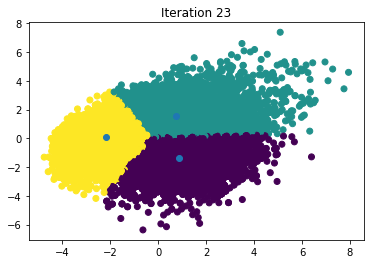

In [45]:
max_iterations = 100
k=3

centroids = random_centroids(data,k)
old_centroids = pd.DataFrame()
iteration =1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data,labels,k)
    plot_clusters(data,labels,centroids, iteration)
    iteration += 1

In [51]:
centroids

,0,1,2
overall,4.781960,5.807503,3.205672
potential,4.506813,6.497870,4.930905
wage_eur,1.118498,1.420500,1.028564
value_eur,1.044909,1.285685,1.026655
age,5.467648,3.598215,2.514741


In [52]:
players[labels == 1][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,3000.0,1500000.0,17
13256,L. Bate,63,83,5000.0,1300000.0,18
13351,Llabrés,63,81,3000.0,1200000.0,19
14144,H. Mejbri,62,84,6000.0,1300000.0,18


### Testing it with sklearn

In [53]:
from sklearn.cluster import KMeans

In [54]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [55]:
centroids = kmeans.cluster_centers_

In [56]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,4.804695,6.228392,3.597498
potential,4.507322,6.625041,5.203142
wage_eur,1.113637,1.656312,1.039810
value_eur,1.040186,1.413689,1.035687
age,5.610605,4.132611,2.712855
